In [1]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# 지표 데이터 가져오기
stock_data = pd.read_excel('index_Infomation_v0.2.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data

,Date,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,samsung_ROE,apple_PER,apple_PBR,...,중앙은행 기준금리,생산자물가지수,수입물가지수,소비자물가지수,수입,수출,경상수지,소비자심리지수,기업경기실사지수,foreign_exchange_reserves
0,2014-01-02,4143.069824,1831.979980,16441.349609,1967.19,8.50,1.90,0.223529,2.707603,4.225919,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
1,2014-01-03,4131.910156,1831.369995,16469.990234,1946.14,8.41,1.88,0.223543,2.648126,4.133090,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
2,2014-01-04,4131.910156,1831.369995,16469.990234,1946.14,8.41,1.88,0.223543,2.648126,4.133090,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
3,2014-01-05,4131.910156,1831.369995,16469.990234,1946.14,8.41,1.88,0.223543,2.648126,4.133090,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
4,2014-01-06,4113.680176,1826.770020,16425.099609,1953.28,8.49,1.90,0.223793,2.662568,4.155630,...,2.5,101.57,123.71,93.73,115.7,104.12,1837.7,110.0,72,"3,484"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,2024-06-26,17805.160156,5477.899902,39127.800781,2792.05,38.15,1.56,0.040891,33.427232,52.171891,...,3.5,119.19,142.76,113.84,126.0,134.46,8922.5,100.9,74,"4,122"
3829,2024-06-27,17858.679688,5482.870117,39164.058594,2784.06,38.29,1.57,0.041003,33.560471,52.379846,...,3.5,119.19,142.76,113.84,126.0,134.46,8922.5,100.9,74,"4,122"
3830,2024-06-28,17732.599609,5460.479980,39118.859375,2797.82,38.24,1.57,0.041056,33.014975,51.528457,...,3.5,119.19,142.76,113.84,126.0,134.46,8922.5,100.9,74,"4,122"
3831,2024-06-29,17732.599609,5460.479980,39118.859375,2797.82,38.24,1.57,0.041056,33.014975,51.528457,...,3.5,119.19,142.76,113.84,126.0,134.46,8922.5,100.9,74,"4,122"


In [3]:
# 삼성 주식 데이터 가져오기

df = stock_data[['Date', 'samsung_Close', '국내 총 생산', '중앙은행 기준금리']]
df

,Date,samsung_Close,국내 총 생산,중앙은행 기준금리
0,2014-01-02,26180,0.8,2.5
1,2014-01-03,25920,0.8,2.5
2,2014-01-04,25920,0.8,2.5
3,2014-01-05,25920,0.8,2.5
4,2014-01-06,26140,0.8,2.5
...,...,...,...,...
3828,2024-06-26,81300,-0.2,3.5
3829,2024-06-27,81600,-0.2,3.5
3830,2024-06-28,81500,-0.2,3.5
3831,2024-06-29,81500,-0.2,3.5


In [4]:
# 데이터 타입 날짜형식으로 변경

df['Date'] = pd.to_datetime(stock_data['Date'])

C:\Users\yukyu\AppData\Local\Temp\ipykernel_29684\2824288394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(stock_data['Date'])


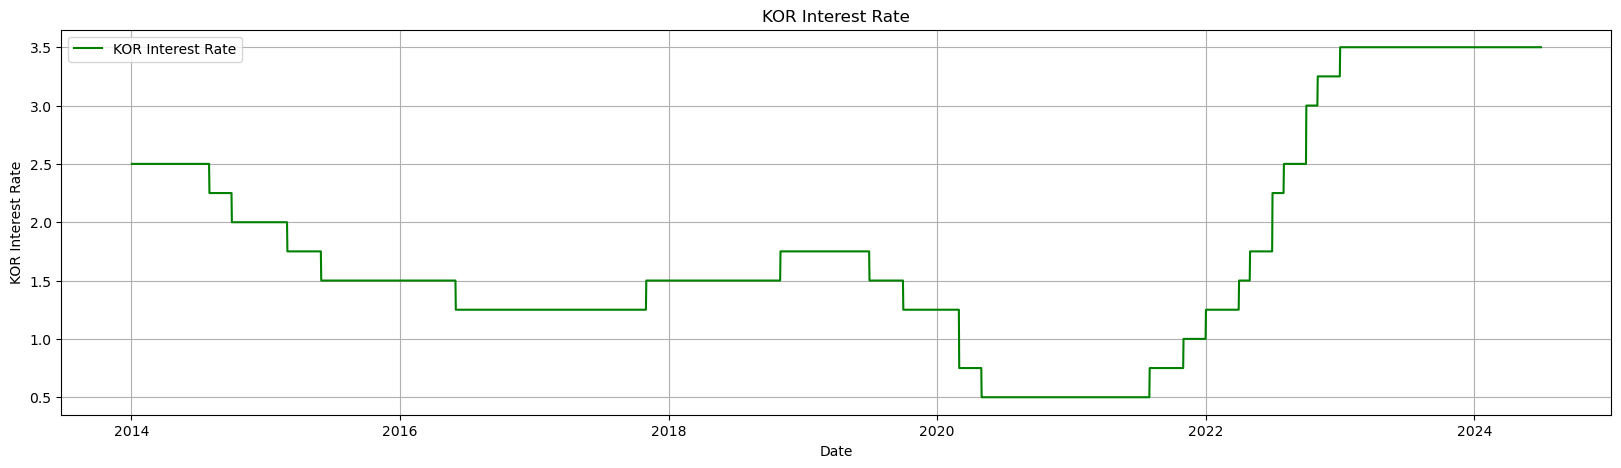

In [5]:
# 기준금리 그래프 그리기

plt.figure(figsize = (20, 5))
plt.plot(df['Date'], df['중앙은행 기준금리'], label = 'KOR Interest Rate', color = 'green')

plt.title('KOR Interest Rate')
plt.xlabel("Date")
plt.ylabel("KOR Interest Rate")
plt.legend()
plt.grid(True)

plt.show()

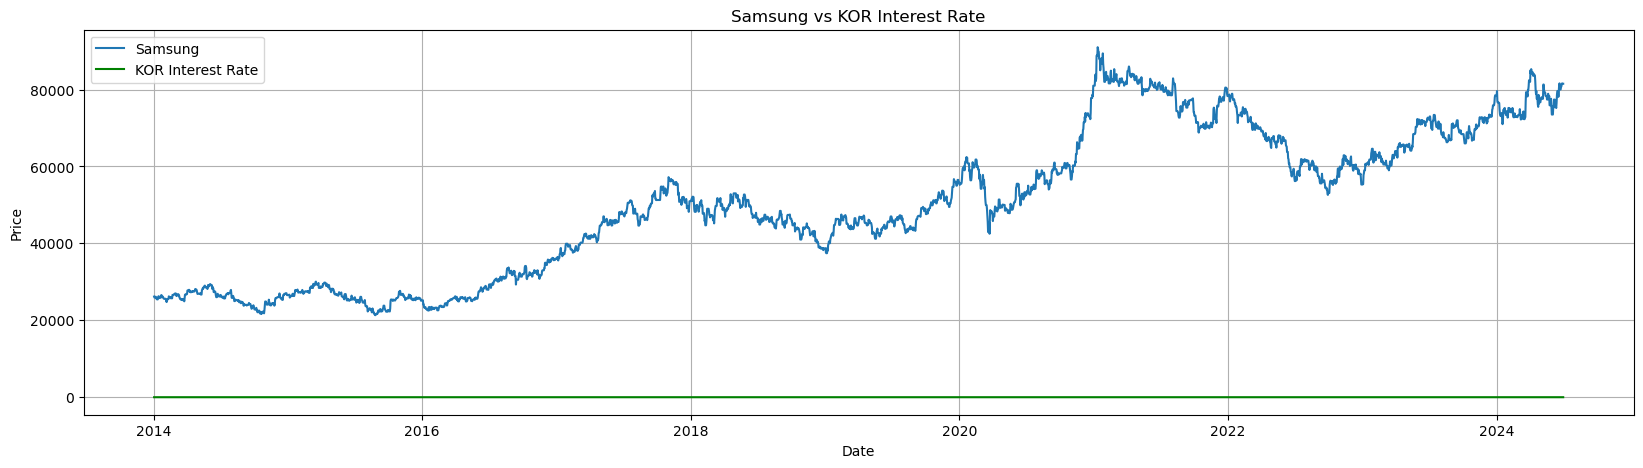

In [6]:
# 삼성전자 & 기준금리 그래프 그리기

plt.figure(figsize = (20, 5))
plt.plot(df['Date'], df['samsung_Close'], label = 'Samsung')
plt.plot(df['Date'], df['중앙은행 기준금리'], label = 'KOR Interest Rate', color = 'green')

plt.title('Samsung vs KOR Interest Rate')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [7]:
# 정규화

def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [8]:
samsung_normal_df = normalize(df, 'samsung_Close')

In [9]:
IR_normal_df = normalize(df, '중앙은행 기준금리')

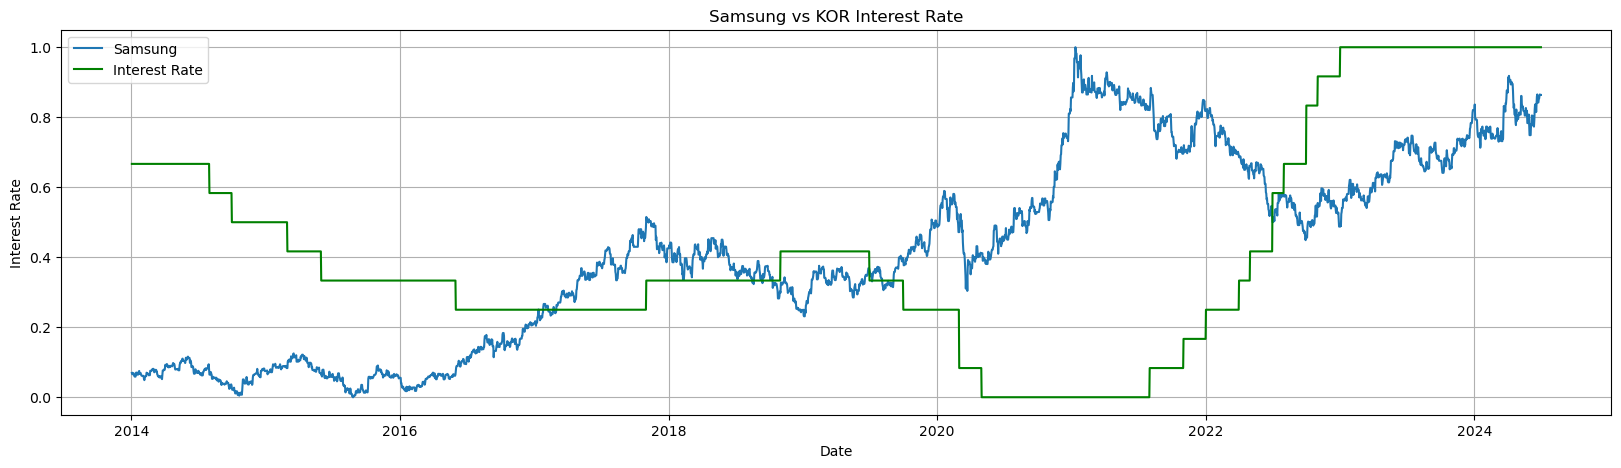

In [10]:
# 정규화 후 그래프

plt.figure(figsize = (20, 5))
plt.plot(df['Date'], samsung_normal_df, label = 'Samsung')
plt.plot(df['Date'], IR_normal_df, label = 'Interest Rate', color = 'green')

plt.title("Samsung vs KOR Interest Rate")
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)

plt.show()

In [11]:
# 변동률 차이 비교

# 일간 변동률 계산

daily_change_samsung_df = df['samsung_Close'].pct_change()
daily_change_IR_df = df['중앙은행 기준금리'].pct_change()

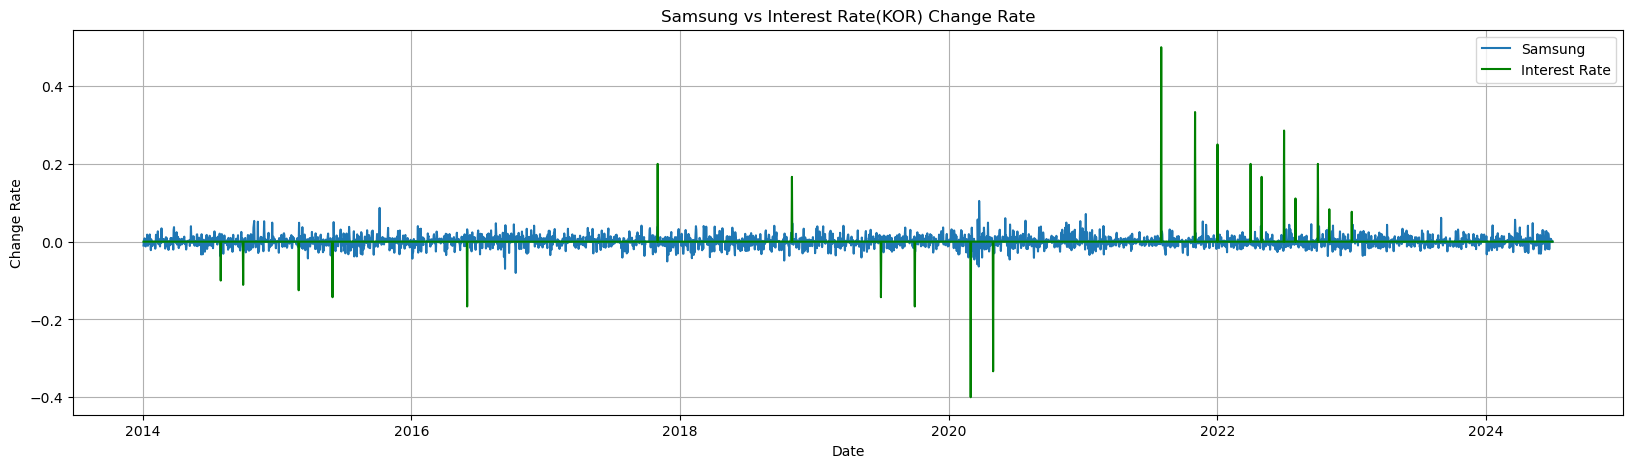

In [12]:
# 그래프 화

plt.figure(figsize = (20, 5))
plt.plot(df['Date'], daily_change_samsung_df, label = 'Samsung')
plt.plot(df['Date'], daily_change_IR_df, label = 'Interest Rate', color = 'green')

plt.title('Samsung vs Interest Rate(KOR) Change Rate')
plt.xlabel('Date')
plt.ylabel('Change Rate')

plt.legend()
plt.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


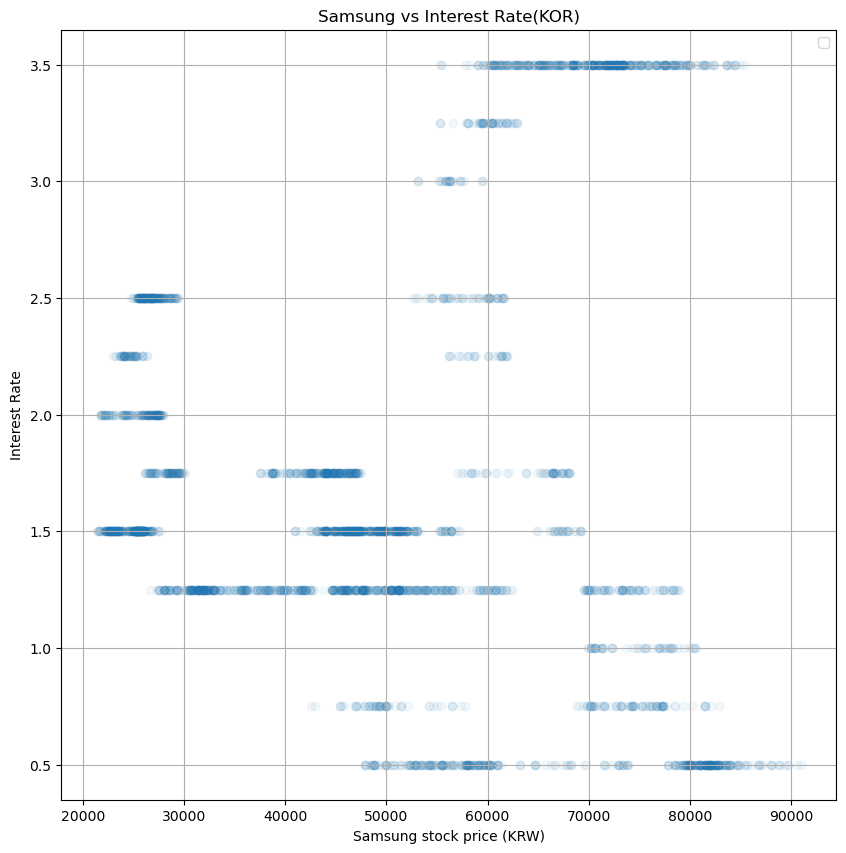

In [13]:
#산점도 플롯

plt.figure(figsize = (10, 10))
plt.scatter(df['samsung_Close'], df['중앙은행 기준금리'], alpha = 0.05)

plt.title('Samsung vs Interest Rate(KOR)')
plt.xlabel('Samsung stock price (KRW)')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)

plt.show()

In [14]:
# Calculate the correlation
correlation = df['중앙은행 기준금리'].corr(df['samsung_Close'])
print(f"Correlation between KOR Interest Rate and Samsung Stock Price: {correlation:.2f}")

Correlation between KOR Interest Rate and Samsung Stock Price: 0.08
